In [31]:

from warnings import filterwarnings 
filterwarnings("ignore")

import pandas as pd
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
tips_data_df = sns.load_dataset("tips")
tips_data_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
get_dummies_df = pd.get_dummies(tips_data_df['day'], dtype=int)
get_dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Thur    244 non-null    int32
 1   Fri     244 non-null    int32
 2   Sat     244 non-null    int32
 3   Sun     244 non-null    int32
dtypes: int32(4)
memory usage: 3.9 KB


In [4]:
get_dummies_df.head()

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [47]:
tips_with_dummies = pd.concat([tips_data_df, get_dummies_df], axis=1)
tips_with_dummies.drop(columns=["day","sex","smoker","time","tip"],inplace=True)
tips_with_dummies.head()

,total_bill,size,Thur,Fri,Sat,Sun
0,16.99,2,0,0,0,1
1,10.34,3,0,0,0,1
2,21.01,3,0,0,0,1
3,23.68,2,0,0,0,1
4,24.59,4,0,0,0,1


In [6]:
linear_regr_model = LinearRegression(fit_intercept=False)
linear_regr_model.fit(tips_with_dummies, tips_data_df["tip"])

LinearRegression(fit_intercept=False)

In [7]:
tips_with_dummies["predict"] = linear_regr_model.predict(tips_with_dummies)
tips_with_dummies["tip"] = tips_data_df["tip"]
tips_with_dummies.head()

,total_bill,size,Thur,Fri,Sat,Sun,predict,tip
0,16.99,2,0,0,0,1,2.686515,1.01
1,10.34,3,0,0,0,1,2.255240,1.66
2,21.01,3,0,0,0,1,3.247481,3.50
3,23.68,2,0,0,0,1,3.308642,3.31
4,24.59,4,0,0,0,1,3.767531,3.61


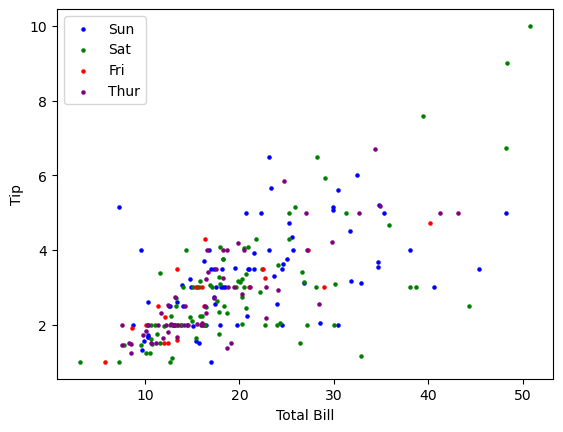

In [9]:
fig1, ax1 = plt.subplots()
day_dict = {"Sun":"blue","Sat":"green","Fri":"red","Thur":"purple"}

for day, color in day_dict.items():
  today = tips_with_dummies[tips_with_dummies[day] == 1]
  ax1.scatter(x=today["total_bill"], y=today["tip"], c=color, label=day, s=5)

ax1.legend([day for day, color in day_dict.items()],loc='upper left')
ax1.set_xlabel("Total Bill")
ax1.set_ylabel("Tip")
plt.show()

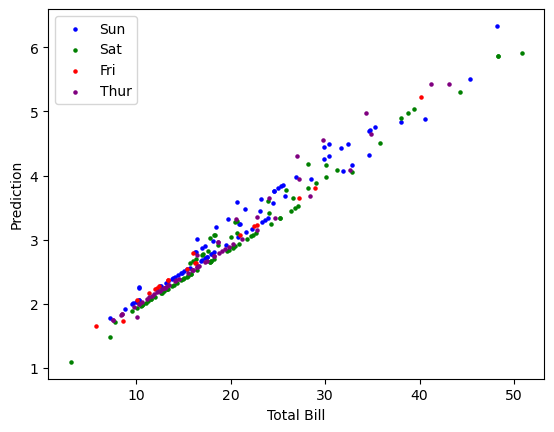

In [11]:
fig2, ax2 = plt.subplots()
day_dict = {"Sun":"blue","Sat":"green","Fri":"red","Thur":"purple"}

for day, color in day_dict.items():
  today = tips_with_dummies[tips_with_dummies[day] == 1]
  ax2.scatter(x=today["total_bill"], y=today["predict"], c=color, label=day, s=5)

ax2.legend([day for day, color in day_dict.items()],loc='upper left')
ax2.set_xlabel("Total Bill")
ax2.set_ylabel("Prediction")
plt.show()

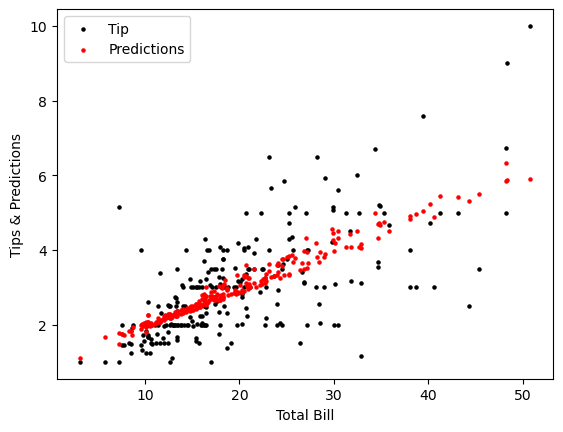

In [29]:
fig3, ax3 = plt.subplots()

ax3.scatter(x=tips_with_dummies["total_bill"], y=tips_with_dummies["tip"], c="black", label="Tips", s=5)
ax3.scatter(x=tips_with_dummies["total_bill"], y=tips_with_dummies["predict"], c="red", label="Predictions", s=5)

ax3.legend(["Tip","Predictions"],loc='upper left')
ax3.set_xlabel("Total Bill")
ax3.set_ylabel("Tips & Predictions")
plt.show()

In [43]:
print(f'MSE = {mean_squared_error(tips_with_dummies["tip"],tips_with_dummies["predict"])}')
print(f'MAE = {mean_absolute_error(tips_with_dummies["tip"],tips_with_dummies["predict"])}')

MSE = 1.0121298853078433
MAE = 0.7351820851734029
